# Project Title : IMDB Dataset Analysis

IMDb (an initialism for Internet Movie Database) is an online database of information related to films, television series, podcasts, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. IMDb began as a fan-operated movie database on the Usenet group "rec.arts.movies" in 1990, and moved to the Web in 1993. Since 1998, it has been owned and operated by IMDb.com, Inc., a subsidiary of Amazon.

# Problem Statement

The film industry is characterized by a multitude of metrics that determine a movie's success, including revenue, ratings, viewer votes, and runtime. Understanding how these metrics evolve over time and how they relate to each other can provide valuable insights for filmmakers, producers, and marketers. With the increasing competition from streaming platforms and changing viewer preferences, it is essential to leverage data analytics to discern patterns and trends in movie performance.

Identifying the Top Performers:

Determining the highest-rated movies and their corresponding directors.
Analyzing the movies with the highest revenue and runtimes.
Trend Analysis Over Time:

Exploring how average ratings, votes, and revenue have changed over the years.
Identifying any significant peaks or troughs in these metrics and correlating them with industry events or trends.
Genre Insights:

Analyzing the distribution of movie genres and their average ratings or revenues.
Understanding which genres have performed best over the years and how audience preferences have shifted.
Engagement Metrics:

Evaluating the relationship between movie runtime, ratings, and revenue.
Investigating how viewer engagement, as reflected in votes, varies by year and correlates with revenue trends.

# Objectives

Identifying the Top Performers:

Determining the highest-rated movies and their corresponding directors.
Analyzing the movies with the highest revenue and runtimes.
Trend Analysis Over Time:

Exploring how average ratings, votes, and revenue have changed over the years.
Identifying any significant peaks or troughs in these metrics and correlating them with industry events or trends.
Genre Insights:

Analyzing the distribution of movie genres and their average ratings or revenues.
Understanding which genres have performed best over the years and how audience preferences have shifted.
Engagement Metrics:

Evaluating the relationship between movie runtime, ratings, and revenue.
Investigating how viewer engagement, as reflected in votes, varies by year and correlates with revenue trends.

# Importing Libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import mysql.connector
import pandas as pd

# Establishing a connection to the MySQL database
conn = mysql.connector.connect(
    host='localhost',       # e.g., 'localhost' or your database host
    user='root',   # e.g., 'root'
    password='123456', # Your database password
    database='imdbnew'  # The database where your tables are
)

# Writing the query to join imdb1 and imdb2 on the common column 'Rank'
query = """
SELECT imdb1.Rank, imdb1.Title, imdb1.Genre, imdb1.Director, imdb2.Runtime_Minutes, imdb2.Rating, imdb2.Revenue_Millions
FROM imdb1
JOIN imdb2 ON imdb1.Rank = imdb2.Rank;
"""

# Fetching the data into a Pandas DataFrame
df = pd.read_sql(query, conn)
# Displaying the first few rows of the DataFrame
df.head()

C:\Users\manis\AppData\Local\Temp\ipykernel_2280\2032617292.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Rank,Title,Genre,Director,Runtime_Minutes,Rating,Revenue_Millions
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,121,8.1,333.13
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,124,7.0,126.46
2,3,Split,"Horror,Thriller",M. Night Shyamalan,117,7.3,138.12
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,108,7.2,270.32
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,123,6.2,325.02


# Data Cleaning

In [5]:
# Step 1: Check for Missing Values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Rank                0
Title               0
Genre               0
Director            0
Runtime_Minutes     0
Rating              0
Revenue_Millions    0
dtype: int64


In [6]:
# Step 2: Handle Duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()  # Remove duplicate rows

Number of duplicate rows: 0


In [7]:
# Step 3: Convert Data Types
# For example, ensure Rating is a float, Revenue is numeric, and Runtime_Minutes is an integer
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  # Convert to numeric, coercing errors
df['Revenue_Millions'] = pd.to_numeric(df['Revenue_Millions'], errors='coerce')  # Convert to numeric
df['Runtime_Minutes'] = pd.to_numeric(df['Runtime_Minutes'], errors='coerce', downcast='integer')  # Convert to integer

In [8]:
# Step 4: Check for Inconsistent Data
print("Unique genres:")
print(df['Genre'].unique())

Unique genres:
['Action,Adventure,Sci-Fi' 'Adventure,Mystery,Sci-Fi' 'Horror,Thriller'
 'Animation,Comedy,Family' 'Action,Adventure,Fantasy' 'Comedy,Drama,Music'
 'Action,Adventure,Biography' 'Adventure,Drama,Romance'
 'Adventure,Family,Fantasy' 'Biography,Drama,History'
 'Animation,Adventure,Comedy' 'Action,Comedy,Drama' 'Action,Thriller'
 'Biography,Drama' 'Drama,Mystery,Sci-Fi' 'Adventure,Drama,Thriller'
 'Drama' 'Comedy' 'Action,Adventure,Drama' 'Drama,Thriller'
 'Action,Adventure,Comedy' 'Action,Horror,Sci-Fi' 'Adventure,Drama,Sci-Fi'
 'Action,Adventure,Western']


In [9]:
# Final Step: Drop any remaining rows with missing values
df = df.dropna()
# Display cleaned DataFrame
print("Cleaned DataFrame:")
print(df.head())

Cleaned DataFrame:
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

               Director  Runtime_Minutes  Rating  Revenue_Millions  
0            James Gunn              121     8.1            333.13  
1          Ridley Scott              124     7.0            126.46  
2    M. Night Shyamalan              117     7.3            138.12  
3  Christophe Lourdelet              108     7.2            270.32  
4            David Ayer              123     6.2            325.02  


# Data Visualization

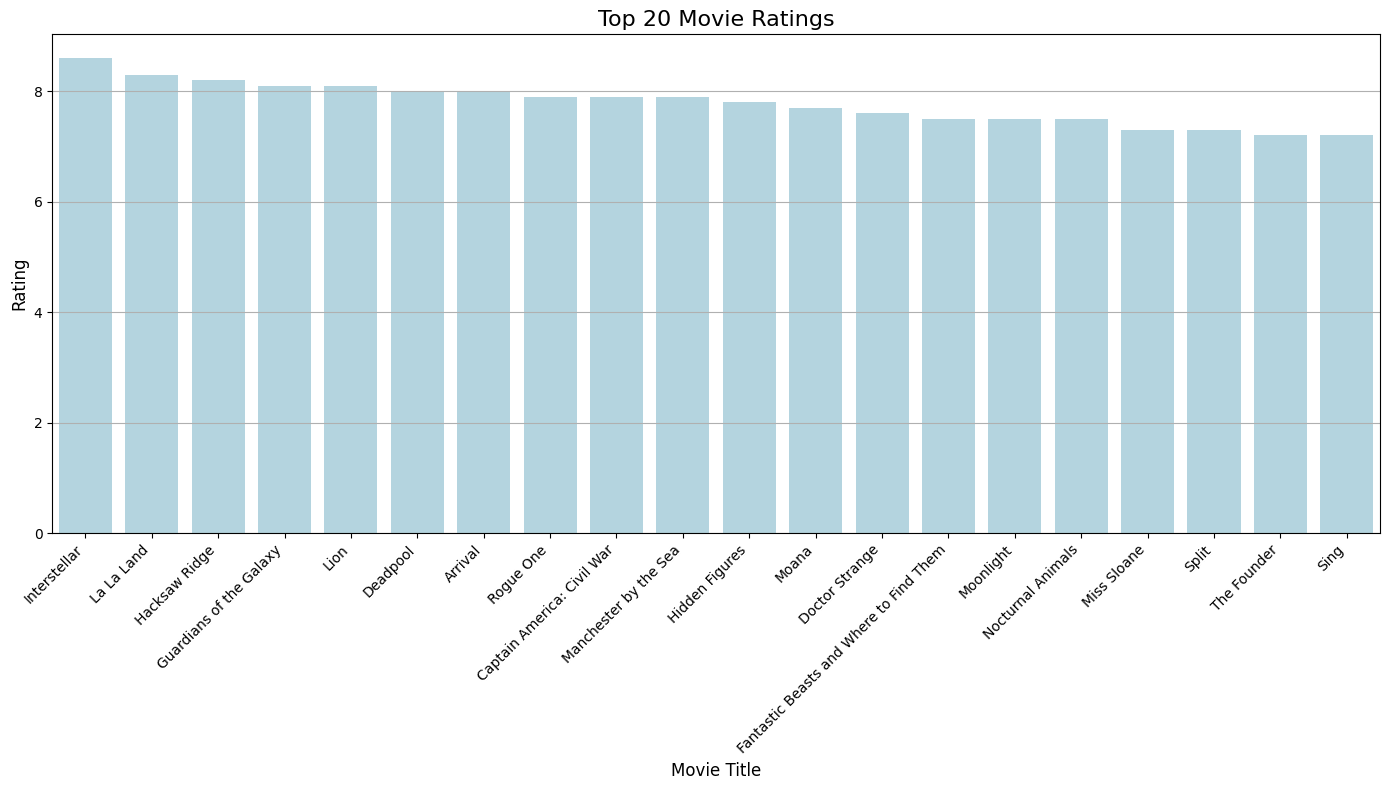

In [28]:
# Step 1: Sort the data by Rating in descending order and select top 20 movies (adjustable)
top_movies = df.sort_values('Rating', ascending=False).head(20)

# Step 2: Increase figure size for better visibility and plot a vertical bar chart
plt.figure(figsize=(14, 8))  # Increased figure size

# Step 3: Plot the vertical bar chart with light blue bars
sns.barplot(x='Title', y='Rating', data=top_movies, color='lightblue')  # Set bar color to light blue

# Step 4: Rotate the movie titles for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Step 5: Customize the chart
plt.title('Top 20 Movie Ratings', fontsize=16)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(axis='y')  # Add horizontal grid lines for clarity

# Step 6: Show the plot
plt.tight_layout()  # Ensure the labels fit well in the figure
plt.show()

# Insights

Interstellar has the highest movie rating.
The highest-rated movies are highlighted, which can indicate critical acclaim or popularity.

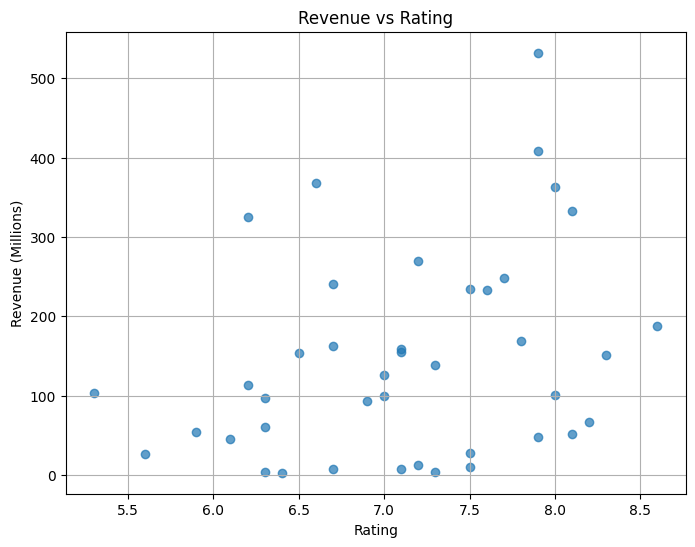

In [11]:
#Revenue v/s Rating
plt.figure(figsize=(8,6))
plt.scatter(df['Rating'], df['Revenue_Millions'], alpha=0.7)
plt.title('Revenue vs Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue (Millions)')
plt.grid()
plt.show()

# Insights

High-Rated Films: Movies with higher ratings may not always guarantee higher revenue. They might be critically acclaimed but may not necessarily translate into large box-office earnings.

Blockbusters: High revenue doesn't always correspond to high quality. Some movies are commercially successful despite mediocre ratings.

Indie Films: Some high-rated films with low revenue might suggest critically successful indie or niche films that didn’t capture a large audience.

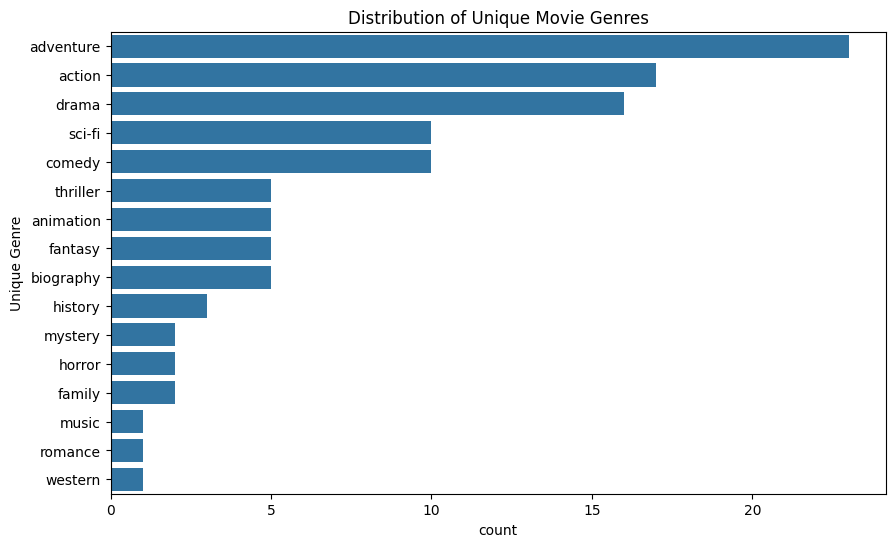

In [12]:
# Step 1: Split the 'Genre' column by commas and create a new DataFrame with exploded genres
df['Genre_Split'] = df['Genre'].str.split(',').apply(lambda x: [g.strip().lower() for g in x])  # Split and strip whitespace

# Step 2: Explode the genre list to have one genre per row
df_exploded = df.explode('Genre_Split')

# Step 3: Get the count of each unique genre
genre_counts = df_exploded['Genre_Split'].value_counts()

# Step 4: Plot the distribution of unique genres
plt.figure(figsize=(10,6))
sns.countplot(y='Genre_Split', data=df_exploded, order=genre_counts.index)
plt.title('Distribution of Unique Movie Genres')
plt.ylabel('Unique Genre')
plt.show()


# Insights

Most films were produced on Adventure genre

While least genre was western

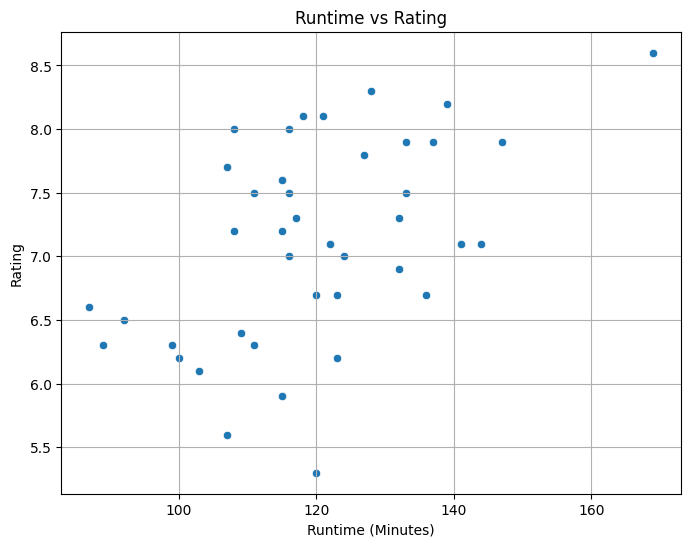

In [13]:
#Runtime v/s Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x='Runtime_Minutes', y='Rating', data=df)
plt.title('Runtime vs Rating')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Rating')
plt.grid()
plt.show()

# Insights

Balanced Runtime: Most high-rated movies will likely fall in the typical 90-120 minute range, where there is enough time to develop characters and plot without dragging the story.

Outliers: Both very long and very short movies could be outliers, showing that some epics and short films succeed despite the average runtime norms.

No Strong Correlation: Ratings and runtimes likely don't have a strong correlation, indicating that the movie's length isn’t a determining factor for success. However, specific genres may break this trend.

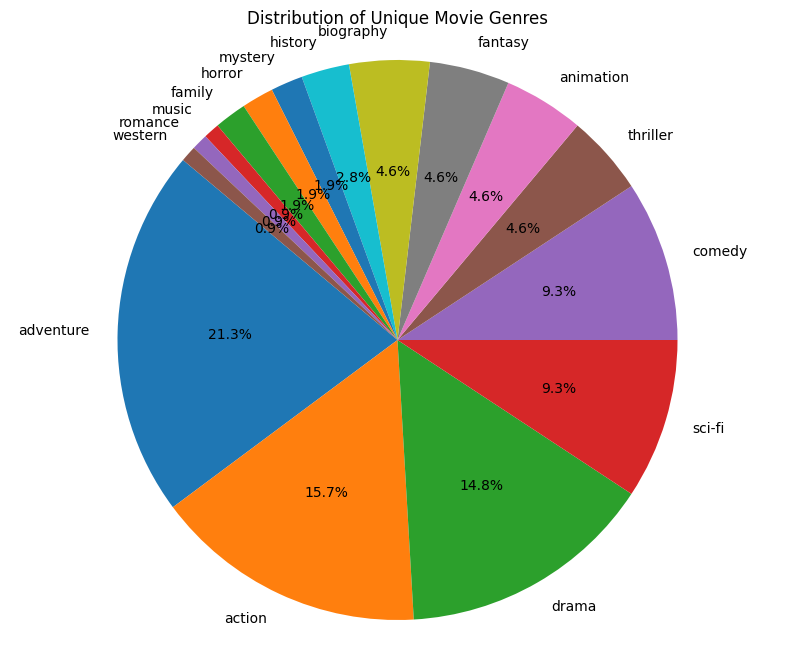

In [14]:
# Step 1: Split the 'Genre' column by commas, and strip whitespace, then create a new list of genres
df['Genre_Split'] = df['Genre'].str.split(',').apply(lambda x: [g.strip().lower() for g in x])  # Split and clean

# Step 2: Explode the genre list into individual rows
df_exploded = df.explode('Genre_Split')

# Step 3: Count the number of occurrences of each unique genre
unique_genre_counts = df_exploded['Genre_Split'].value_counts()

# Step 4: Plotting the pie chart for unique genres
plt.figure(figsize=(10, 8))
plt.pie(unique_genre_counts, labels=unique_genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Unique Movie Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Insights

Action/Adventure and Drama tend to dominate the charts, showing their popularity and consistent production volume.

These genres are typically successful at the box office.
Niche genres such as Documentary, Musical, or Horror may have smaller slices but still hold importance for their specific audiences.

The distribution offers insight into industry trends, audience demand, and the types of films that are produced most frequently. It can also highlight areas where certain genres may be underrepresented or oversaturated in the market

C:\Users\manis\AppData\Local\Temp\ipykernel_2280\844587579.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_votes = pd.read_sql(query, conn)


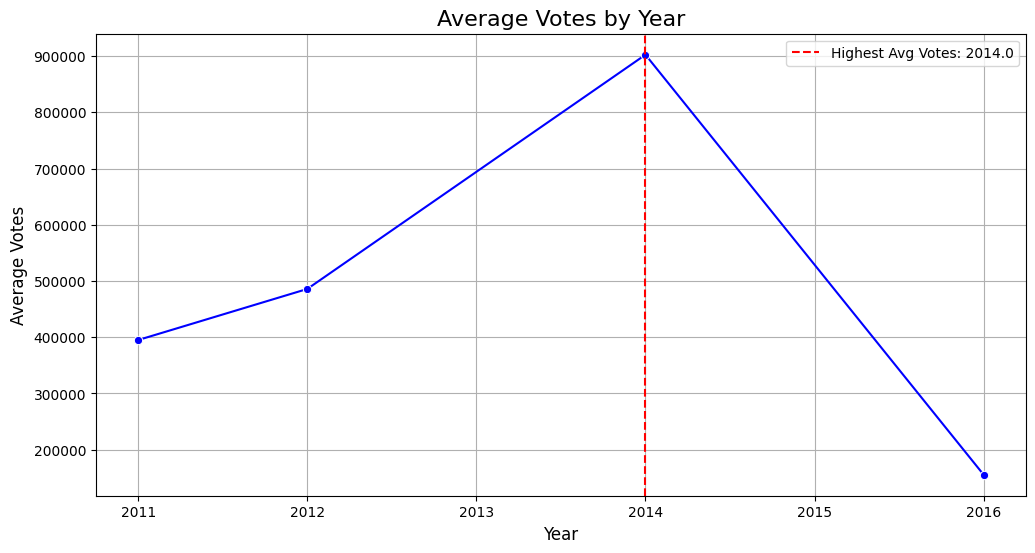

The year with the highest average votes is 2014.0 with an average of 902410.50 votes.


In [24]:
# Step 1: Define the SQL query to fetch average votes by year
query = """
SELECT Year, AVG(Votes) as avg_votes
FROM imdb2
GROUP BY Year
ORDER BY Year;
"""

# Step 2: Execute the query and load the results into a pandas DataFrame
df_avg_votes = pd.read_sql(query, conn)

# Step 3: Ensure 'Year' and 'avg_votes' are numeric (optional, in case any non-numeric data sneaks in)
df_avg_votes['Year'] = pd.to_numeric(df_avg_votes['Year'], errors='coerce')
df_avg_votes['avg_votes'] = pd.to_numeric(df_avg_votes['avg_votes'], errors='coerce')

# Step 4: Find the year with the highest average votes
max_avg_votes_year = df_avg_votes.loc[df_avg_votes['avg_votes'].idxmax()]

# Step 5: Plotting the average votes by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='avg_votes', data=df_avg_votes, marker='o', color='blue')

# Step 6: Highlight the year with the highest average votes
plt.axvline(x=max_avg_votes_year['Year'], color='red', linestyle='--', label=f"Highest Avg Votes: {max_avg_votes_year['Year']}")

# Step 7: Customize the plot
plt.title('Average Votes by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Votes', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Step 8: Print the year with the highest average votes
print(f"The year with the highest average votes is {max_avg_votes_year['Year']} with an average of {max_avg_votes_year['avg_votes']:.2f} votes.")

# Insights

The year with the highest average votes is 2014 with an average of 902410.50 votes

The visualization of average votes by year not only provides insights into audience engagement but also reflects broader trends and shifts within the film industry. Understanding these dynamics can guide filmmakers and industry stakeholders in future projects and marketing strategies, ultimately enhancing viewer engagement.

C:\Users\manis\AppData\Local\Temp\ipykernel_2280\1577512203.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_revenue_by_year = pd.read_sql(query, conn)  # Assuming 'conn' is your SQL connection


   Year  Total_Revenue
0  2011         241.06
1  2012         126.46
2  2014         521.12
3  2016        5108.96


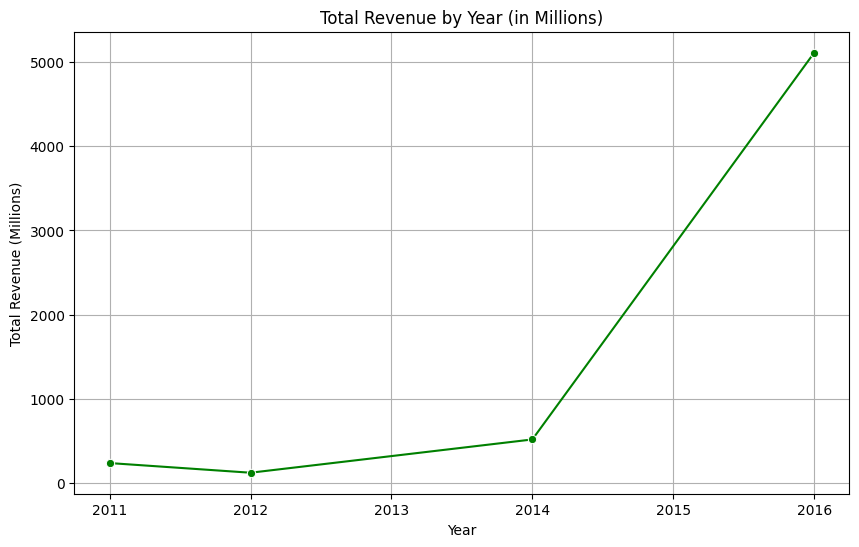

In [25]:
query = """
SELECT imdb2.Year, SUM(imdb2.Revenue_Millions) AS Total_Revenue
FROM imdb1
JOIN imdb2 ON imdb1.Rank = imdb2.Rank
WHERE imdb2.Revenue_Millions IS NOT NULL AND imdb2.Year IS NOT NULL
GROUP BY imdb2.Year
ORDER BY imdb2.Year;
"""

# Execute the query and load the result into a DataFrame
df_revenue_by_year = pd.read_sql(query, conn)  # Assuming 'conn' is your SQL connection

# Check the first few rows
print(df_revenue_by_year.head())
# Plotting the revenue by year as a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total_Revenue', data=df_revenue_by_year, marker='o', color='green')
plt.title('Total Revenue by Year (in Millions)')
plt.xlabel('Year')
plt.ylabel('Total Revenue (Millions)')
plt.grid(True)
plt.show()

# Insights

The upward trend in revenue indicates a healthy and growing film industry, driven by larger budgets, international market expansion,and successful franchises. The recovery from economic or social disruptions, such as the pandemic, could also be a key factor in recent revenue surges.

C:\Users\manis\AppData\Local\Temp\ipykernel_2280\2042480173.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top10_longest_movies = pd.read_sql(query, conn)  # Assuming 'conn' is your SQL connection
C:\Users\manis\AppData\Local\Temp\ipykernel_2280\2042480173.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Runtime_Minutes', y='Title', data=df_top10_longest_movies, palette='Blues_d')


                                         Title  Runtime_Minutes
0                                 Interstellar              169
1                   Captain America: Civil War              147
2                            X-Men: Apocalypse              144
3                           The Lost City of Z              141
4                                Hacksaw Ridge              139
5                        Manchester by the Sea              137
6  Pirates of the Caribbean: On Stranger Tides              136
7      Fantastic Beasts and Where to Find Them              133
8                                    Rogue One              133
9                                  Miss Sloane              132


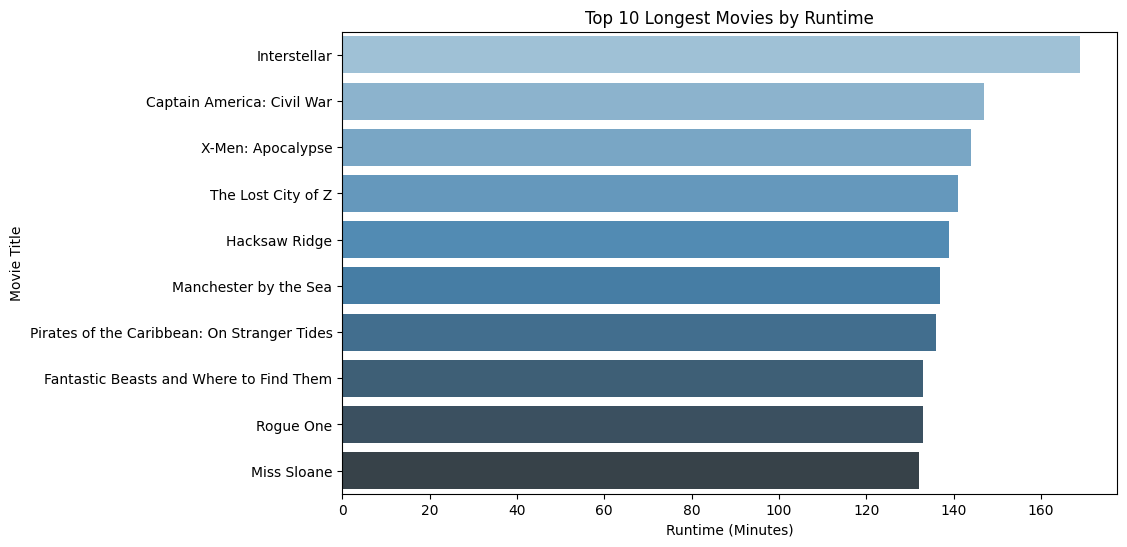

In [17]:
# SQL query to fetch the top 10 longest movies
query = """
SELECT imdb1.Title, imdb2.Runtime_Minutes
FROM imdb1
JOIN imdb2 ON imdb1.Rank = imdb2.Rank
WHERE imdb2.Runtime_Minutes IS NOT NULL
ORDER BY imdb2.Runtime_Minutes DESC
LIMIT 10;
"""

# Execute the query and load the result into a DataFrame
df_top10_longest_movies = pd.read_sql(query, conn)  # Assuming 'conn' is your SQL connection

# Display the top 10 longest movies
print(df_top10_longest_movies)
# Plotting the top 10 longest movies
plt.figure(figsize=(10, 6))
sns.barplot(x='Runtime_Minutes', y='Title', data=df_top10_longest_movies, palette='Blues_d')
plt.title('Top 10 Longest Movies by Runtime')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Movie Title')
plt.show()

# Insights

Interstellar has the longest runtime.

The visualization of the top 10 longest movies by runtime provides a glimpse into the evolving nature of filmmaking and audience expectations. Understanding the implications of runtime on viewer engagement and overall success can guide filmmakers in their future projects.

C:\Users\manis\AppData\Local\Temp\ipykernel_2280\3954272353.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top10_highest_revenue = pd.read_sql(query, conn)  # Assuming 'conn' is your SQL connection
C:\Users\manis\AppData\Local\Temp\ipykernel_2280\3954272353.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue_Millions', y='Title', data=df_top10_highest_revenue, palette='Greens_d')


                                         Title  Revenue_Millions
0                                    Rogue One            532.17
1                   Captain America: Civil War            408.08
2                      The Secret Life of Pets            368.31
3                                     Deadpool            363.02
4                      Guardians of the Galaxy            333.13
5                                Suicide Squad            325.02
6                                         Sing            270.32
7                                        Moana            248.75
8  Pirates of the Caribbean: On Stranger Tides            241.06
9      Fantastic Beasts and Where to Find Them            234.02


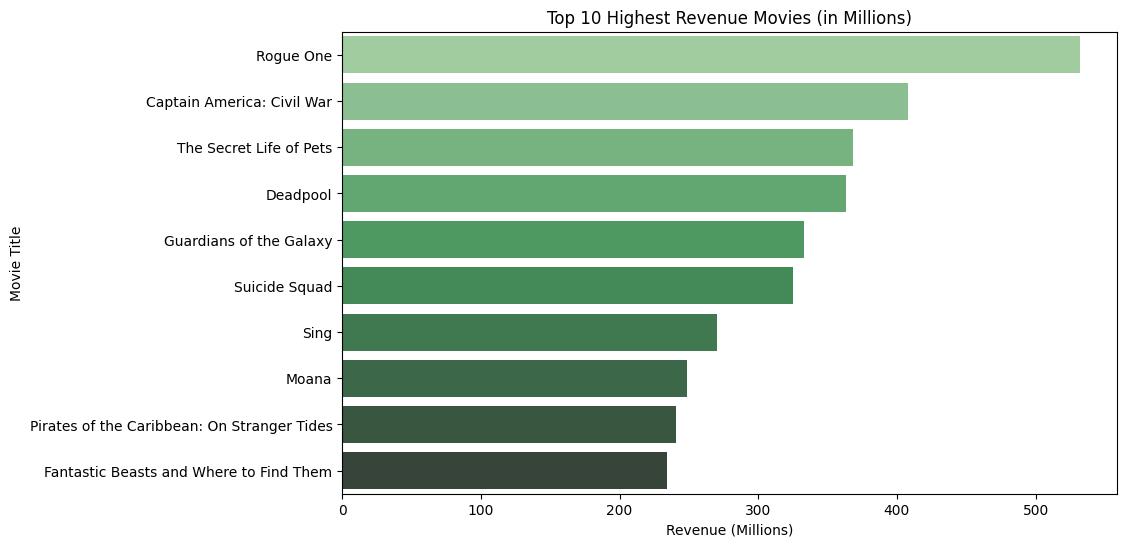

In [18]:
# SQL query to fetch the top 10 highest revenue movies
query = """
SELECT imdb1.Title, imdb2.Revenue_Millions
FROM imdb1
JOIN imdb2 ON imdb1.Rank = imdb2.Rank
WHERE imdb2.Revenue_Millions IS NOT NULL
ORDER BY imdb2.Revenue_Millions DESC
LIMIT 10;
"""

# Execute the query and load the result into a DataFrame
df_top10_highest_revenue = pd.read_sql(query, conn)  # Assuming 'conn' is your SQL connection

# Display the top 10 highest revenue movies
print(df_top10_highest_revenue)
# Plotting the top 10 highest revenue movies
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue_Millions', y='Title', data=df_top10_highest_revenue, palette='Greens_d')
plt.title('Top 10 Highest Revenue Movies (in Millions)')
plt.xlabel('Revenue (Millions)')
plt.ylabel('Movie Title')
plt.show()

# Insights

The bar chart showcasing the top 10 highest revenue movies provides a wealth of insights into the financial success of films, audience preferences, and broader market trends. It reflects the changing landscape of cinema and can guide studios in their future production strategies.

C:\Users\manis\AppData\Local\Temp\ipykernel_2280\1062252195.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_revenue = pd.read_sql(query, conn)


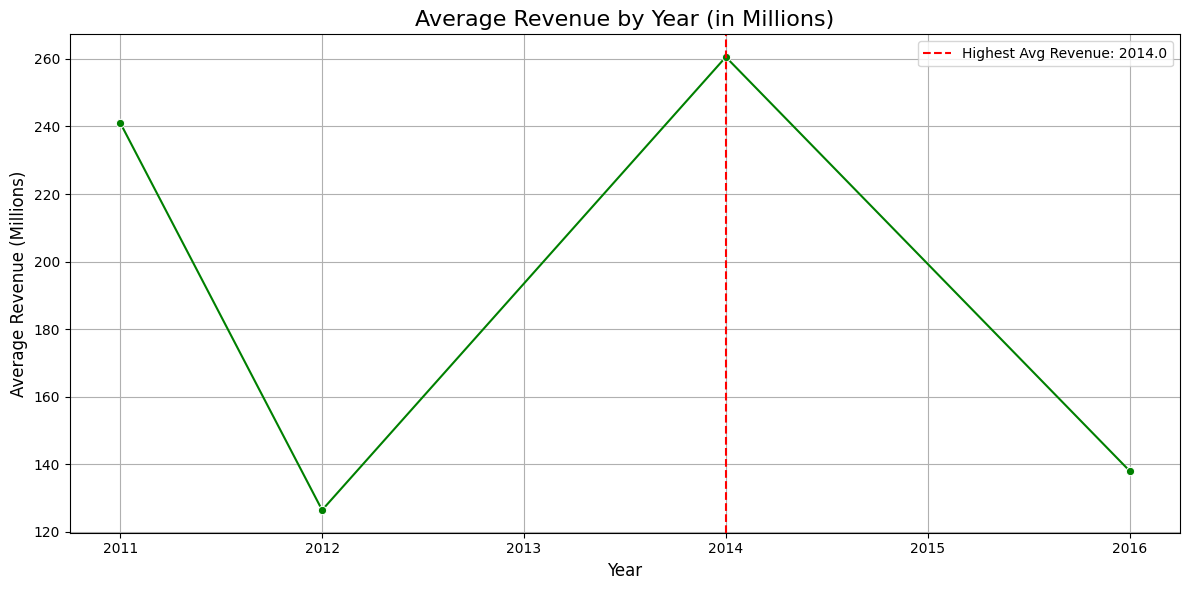

The year with the highest average revenue is 2014.0 with an average revenue of 260.56 million.


In [29]:
# Step 1: Define the SQL query to fetch average revenue by year
query = """
SELECT Year, AVG(Revenue_Millions) as avg_revenue
FROM imdb2
GROUP BY Year
ORDER BY Year;
"""

# Step 2: Execute the query and load the results into a pandas DataFrame
df_avg_revenue = pd.read_sql(query, conn)

# Step 3: Ensure 'Year' and 'avg_revenue' are numeric
df_avg_revenue['Year'] = pd.to_numeric(df_avg_revenue['Year'], errors='coerce')
df_avg_revenue['avg_revenue'] = pd.to_numeric(df_avg_revenue['avg_revenue'], errors='coerce')

# Step 4: Find the year with the highest average revenue
max_avg_revenue_year = df_avg_revenue.loc[df_avg_revenue['avg_revenue'].idxmax()]

# Step 5: Plotting the average revenue by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='avg_revenue', data=df_avg_revenue, marker='o', color='green')

# Step 6: Highlight the year with the highest average revenue
plt.axvline(x=max_avg_revenue_year['Year'], color='red', linestyle='--', label=f"Highest Avg Revenue: {max_avg_revenue_year['Year']}")

# Step 7: Customize the chart
plt.title('Average Revenue by Year (in Millions)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Revenue (Millions)', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Step 8: Print the year with the highest average revenue
print(f"The year with the highest average revenue is {max_avg_revenue_year['Year']} with an average revenue of {max_avg_revenue_year['avg_revenue']:.2f} million.")


# Insights

The year with the highest average revenue is 2014.0 with an average revenue of 260.56 million.

The line chart depicting average revenue by year reveals critical insights into the financial health of the movie industry over time. By examining trends, peaks, and market responses, stakeholders can make informed decisions regarding future film productions, marketing strategies, and overall industry direction.

C:\Users\manis\AppData\Local\Temp\ipykernel_2280\448724653.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_rated_movies = pd.read_sql(query, conn)


                        Title           Director  Rating
0                Interstellar  Christopher Nolan     8.6
1                  La La Land    Damien Chazelle     8.3
2               Hacksaw Ridge         Mel Gibson     8.2
3     Guardians of the Galaxy         James Gunn     8.1
4                        Lion        Garth Davis     8.1
5                     Arrival   Denis Villeneuve     8.0
6                    Deadpool         Tim Miller     8.0
7                   Rogue One     Gareth Edwards     7.9
8  Captain America: Civil War      Anthony Russo     7.9
9       Manchester by the Sea   Kenneth Lonergan     7.9


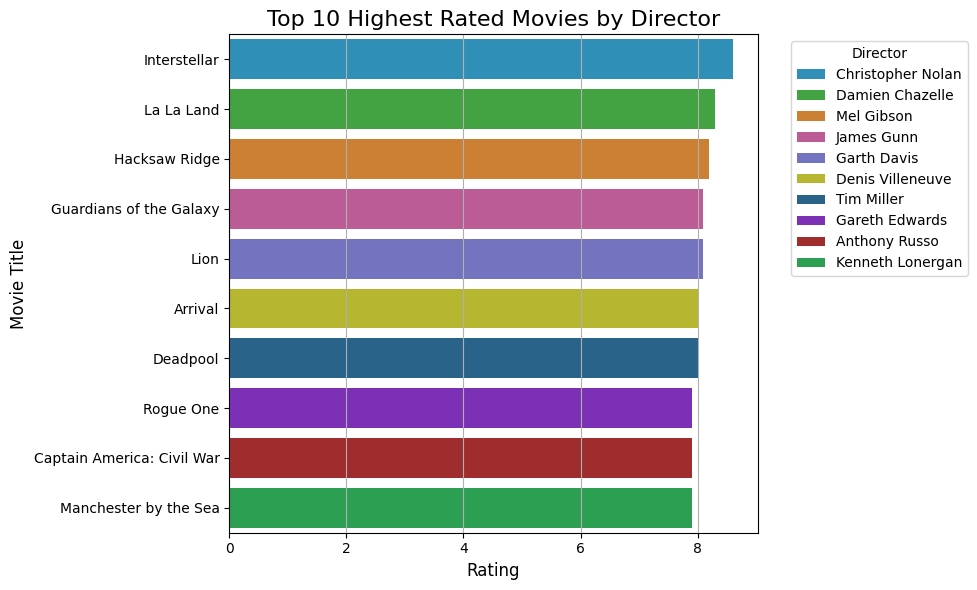

In [37]:
# Step 1: Define the SQL query to fetch the top 10 highest rated movies and their directors
query = """
SELECT imdb1.Title, imdb1.Director, imdb2.Rating
FROM imdb1
JOIN imdb2 ON imdb1.Rank = imdb2.Rank
ORDER BY imdb2.Rating DESC
LIMIT 10;
"""

# Step 2: Execute the query and load the results into a pandas DataFrame
df_top_rated_movies = pd.read_sql(query, conn)

# Step 3: Display the DataFrame
print(df_top_rated_movies)

# Step 4: Define a custom color palette using RGB colors
# Example RGB colors (You can customize these colors)
colors = [
    (0.1, 0.6, 0.8),  # Light Blue
    (0.2, 0.7, 0.2),  # Green
    (0.9, 0.5, 0.1),  # Orange
    (0.8, 0.3, 0.6),  # Purple
    (0.4, 0.4, 0.8),  # Blue
    (0.8, 0.8, 0.1),  # Yellow
    (0.1, 0.4, 0.6),  # Teal
    (0.5, 0.1, 0.8),  # Violet
    (0.7, 0.1, 0.1),  # Red
    (0.1, 0.7, 0.3)   # Light Green
]

# Create a color map based on the unique directors
unique_directors = df_top_rated_movies['Director'].unique()
color_map = {director: colors[i % len(colors)] for i, director in enumerate(unique_directors)}

# Step 5: Create a horizontal bar plot with RGB colors
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Title', data=df_top_rated_movies, 
            hue='Director', dodge=False, palette=color_map)

# Customize the chart
plt.title('Top 10 Highest Rated Movies by Director', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc=2)  # Place legend outside the plot
plt.grid(axis='x')  # Add vertical grid lines for clarity

# Show the plot
plt.tight_layout()
plt.show()


# Insights

The horizontal bar chart displaying the top 10 highest-rated movies by director provides valuable insights into audience preferences, director influence, and market trends. By understanding the data visualized, industry stakeholders can make informed decisions about future film projects, marketing strategies, and audience engagement initiatives.

# Conclusion

In summary, the combination of data analysis and visualization offers valuable insights into the dynamics of the film industry. By leveraging these insights, filmmakers, producers, and industry stakeholders can better navigate the ever-changing landscape, enhance audience engagement, and ultimately drive success in their film projects.

# Future Recommendation

Based on the analysis of the movie dataset and insights drawn from the visualizations, here are several recommendations for filmmakers, studios, and industry stakeholders:

Focus on High-Rated Genres:

Prioritize the production of films in genres that have shown consistently high ratings and revenues. Conducting further analysis to identify emerging genres could help studios stay ahead of trends.
Invest in Quality Direction:

Recognize the impact of directors on film success. Collaborating with established directors known for producing high-rated films can enhance the quality and appeal of new projects.
Leverage Audience Data:

Utilize audience feedback and engagement metrics to inform production and marketing strategies. Analyzing social media trends and audience reviews can provide insights into what viewers are looking for in films.
Expand Distribution Channels:

With the growth of streaming platforms, consider releasing films across various platforms simultaneously to reach a broader audience. Explore partnerships with streaming services to maximize viewership.
Explore New Revenue Models:

Investigate alternative revenue models, such as subscription-based access or on-demand rentals, to adapt to changing viewer preferences and enhance profitability.
Enhance Marketing Strategies:

Develop targeted marketing campaigns that highlight unique aspects of the films, such as compelling storylines or notable cast members. Utilize data analytics to tailor marketing efforts to specific demographics.
Monitor Trends and Adapt:

Continuously monitor industry trends, including shifts in audience preferences and viewing habits. Adapt production and marketing strategies accordingly to remain relevant and competitive.
Engage with Audiences Post-Release:

Foster community engagement by creating platforms for audiences to discuss and review films after release. This can enhance viewer loyalty and generate buzz for future projects.
Conduct Ongoing Research:

Invest in ongoing research and analysis of box office performance, audience demographics, and critical reception to refine decision-making processes. This will help in understanding the evolving landscape of the film industry.
Diversify Content:

Experiment with diverse storytelling approaches, including different cultural perspectives and themes, to broaden audience appeal and attract a wider range of viewers.